<a href="https://colab.research.google.com/github/hemanandinipendurthi/final-yr-project/blob/main/hema_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ***Chronic Heart Disease Risk Classification using Mixed Sensor and Clinical Data***

### **Project Overview**
This project aims to classify patients at different risk levels for **chronic heart disease** using a combination of **sensor data** (ECG, SpO₂, BP) and **clinical categorical features** (chest pain, shortness of breath, etc.).  
The dataset is **tabular**, synthetic, and designed for **machine learning** and **big data scaling studies**.

### **Key Research Questions**
1. Can mixed sensor readings and clinical data accurately classify patients at risk for chronic heart disease?
2. Which sensor features are the strongest predictors of heart disease risk?
3. How does machine learning performance change when scaling the dataset?

### **Dataset Information**
- **Source:** Mendeley Data (Elsevier) — [https://data.mendeley.com/datasets/gsmjh55sfy/1](https://data.mendeley.com/datasets/gsmjh55sfy/1)
- **Type:** Tabular (Numerical + Categorical)
- **Target Variable:** `Triage` — Multiclass (URGENT, SICK, RISK, NORMAL, COLD STATE)
- **Size:** 50,000 records (Big Data)

In the following cells, we will perform:
1. Data Loading and Inspection  
2. Data Cleaning and Preprocessing  
3. Exploratory Data Analysis (EDA)  
4. Feature Encoding and Scaling  
5. Model Training (RandomForest, XGBoost, etc.)  
6. Model Evaluation and Visualization


## **Import Libraries:**
We import all the necessary Python libraries for data analysis, visualization, and machine learning.


In [ ]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


### **Load Dataset:**
We load the uploaded dataset `Big Data - 50000.csv` and display the first few rows to understand its structure.


In [ ]:
# Load the dataset
df = pd.read_csv("/content/Big Data - 50000.csv")

# Display shape and first few rows
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (50000, 15)


,P. ID,Age,Sex,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
0,1,78,F,96,21.0,11.5,No,Yes,Yes,Yes,121,0.4,regular,No,URGENT
1,2,77,F,98,17.5,9.5,No,No,No,No,97,0.4,irregular,Yes,SICK
2,3,59,F,94,22.5,9.0,Yes,No,No,Yes,76,0.4,irregular,No,RISK
3,4,62,M,82,22.5,12.0,No,No,Yes,Yes,64,0.4,regular,No,NORMAL
4,5,78,M,86,11.5,10.5,Yes,Yes,Yes,Yes,106,0.2,irregular,No,SICK


## **Data Inspection:**
We inspect the dataset for missing values, data types, and general statistical summary.


In [ ]:
# Check data info
df.info()

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P. ID      50000 non-null  int64  
 1   Age        50000 non-null  int64  
 2   Sex        50000 non-null  object 
 3   Spo2       50000 non-null  int64  
 4   HBlood     50000 non-null  float64
 5   LBlood     50000 non-null  float64
 6   ChestPain  50000 non-null  object 
 7   SHBreath   50000 non-null  object 
 8   Palip      50000 non-null  object 
 9   Rest       50000 non-null  object 
 10  Peaks      50000 non-null  int64  
 11  QRSwidth   50000 non-null  float64
 12  P_P        50000 non-null  object 
 13  STEl       50000 non-null  object 
 14  Triage     50000 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 5.7+ MB

Missing Values:
 P. ID        0
Age          0
Sex          0
Spo2         0
HBlood       0
LBlood       0
ChestPain    0
SHBreath     0
Palip      

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P. ID,50000.0,NaN,NaN,NaN,25000.5,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
Age,50000.0,NaN,NaN,NaN,65.00758,14.695572,40.0,52.0,65.0,78.0,90.0
Sex,50000,2,M,25142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spo2,50000.0,NaN,NaN,NaN,90.71212,6.348418,80.0,86.0,92.0,96.0,100.0
HBlood,50000.0,NaN,NaN,NaN,17.80125,3.462485,11.0,15.0,18.5,20.5,23.0
LBlood,50000.0,NaN,NaN,NaN,9.36819,1.826775,6.0,8.0,9.5,11.0,12.0
ChestPain,50000,2,Yes,25230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHBreath,50000,2,No,25694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Palip,50000,2,Yes,25062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rest,50000,2,No,25666,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P. ID,50000.0,NaN,NaN,NaN,25000.5,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
Age,50000.0,NaN,NaN,NaN,65.00758,14.695572,40.0,52.0,65.0,78.0,90.0
Sex,50000,2,M,25142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spo2,50000.0,NaN,NaN,NaN,90.71212,6.348418,80.0,86.0,92.0,96.0,100.0
HBlood,50000.0,NaN,NaN,NaN,17.80125,3.462485,11.0,15.0,18.5,20.5,23.0
LBlood,50000.0,NaN,NaN,NaN,9.36819,1.826775,6.0,8.0,9.5,11.0,12.0
ChestPain,50000,2,Yes,25230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHBreath,50000,2,No,25694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Palip,50000,2,Yes,25062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rest,50000,2,No,25666,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis (EDA):**
We explore the dataset visually to understand feature distributions and relationships with the target variable.

Steps:
1. Plot class distribution for the target variable `Triage`.
2. Plot distribution histograms for numerical features.
3. Plot boxplots to detect outliers.
4. Generate a correlation heatmap with values to understand inter-feature relationships.
5. Visualize pair relationships between key sensor features.
6. Visualize average sensor readings by heart disease risk category.


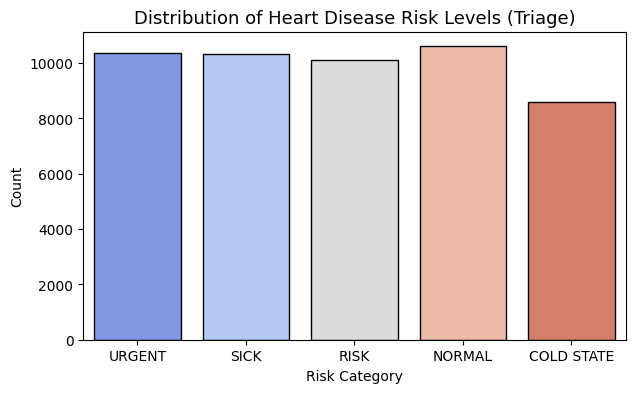

In [ ]:
# Distribution of Target Classes
plt.figure(figsize=(7,4))
sns.countplot(x='Triage', data=df, palette='coolwarm', edgecolor='black')
plt.title("Distribution of Heart Disease Risk Levels (Triage)", fontsize=13)
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

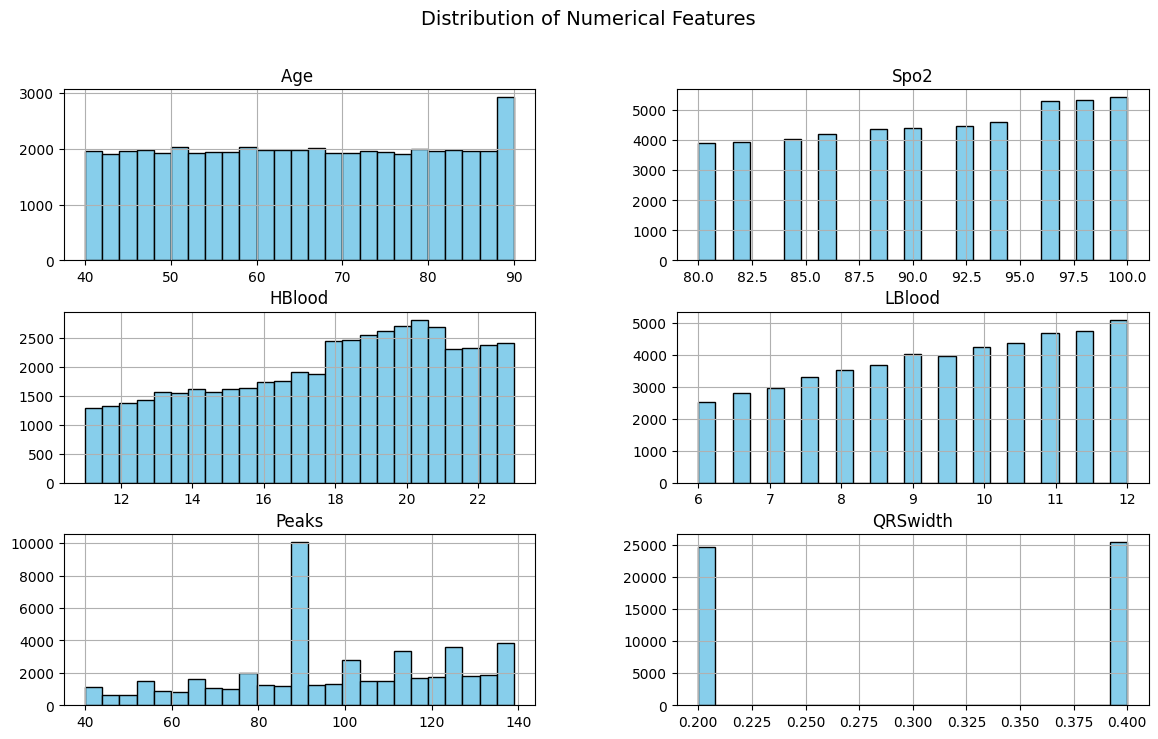

In [ ]:
# Histograms for Numerical Features
numeric_cols = ['Age ', 'Spo2', 'HBlood', 'LBlood', 'Peaks', 'QRSwidth', 'P_P', 'STEl']
df[numeric_cols].hist(bins=25, figsize=(14,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

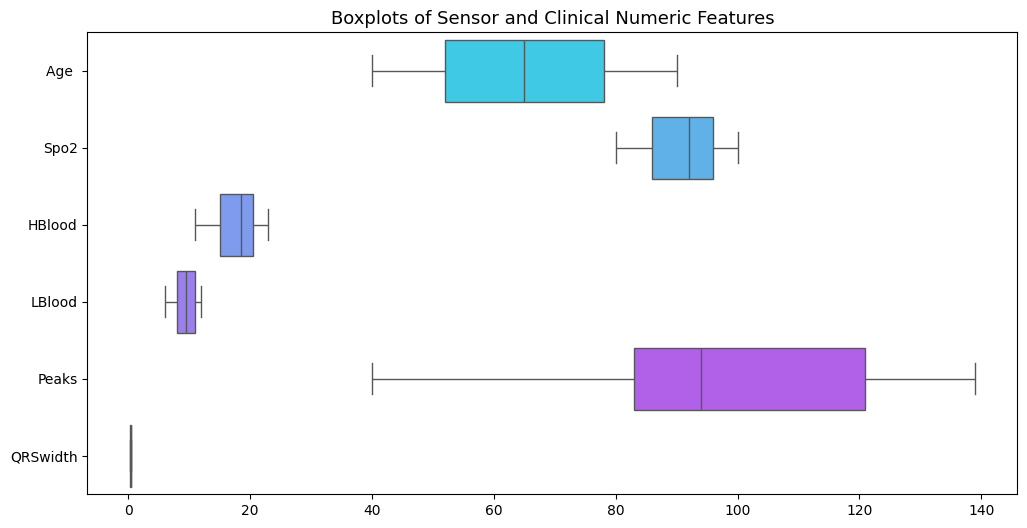

In [ ]:

# Boxplots to detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols], orient='h', palette='cool')
plt.title("Boxplots of Sensor and Clinical Numeric Features", fontsize=13)
plt.show()


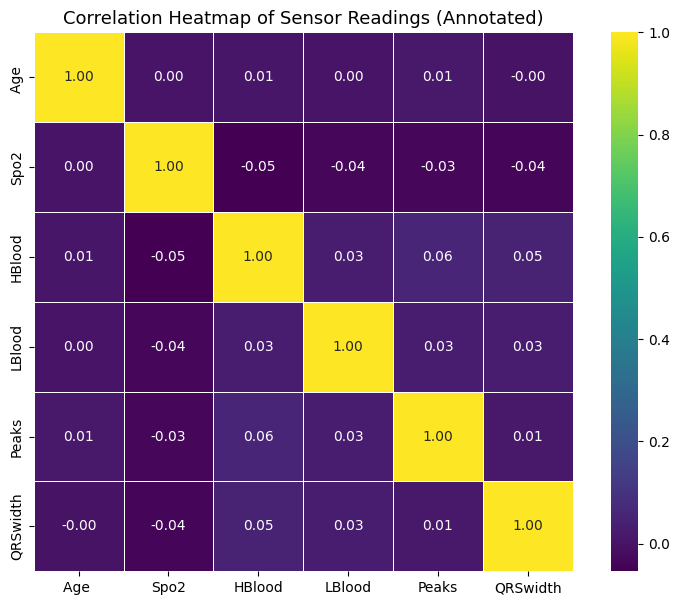

In [ ]:
#  Correlation Heatmap with Annotated Values
plt.figure(figsize=(10,7))
# Corrected numeric_cols list to exclude non-numeric columns for correlation calculation
numeric_cols_for_corr = ['Age ', 'Spo2', 'HBlood', 'LBlood', 'Peaks', 'QRSwidth']
corr_matrix = df[numeric_cols_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Sensor Readings (Annotated)", fontsize=13)
plt.show()

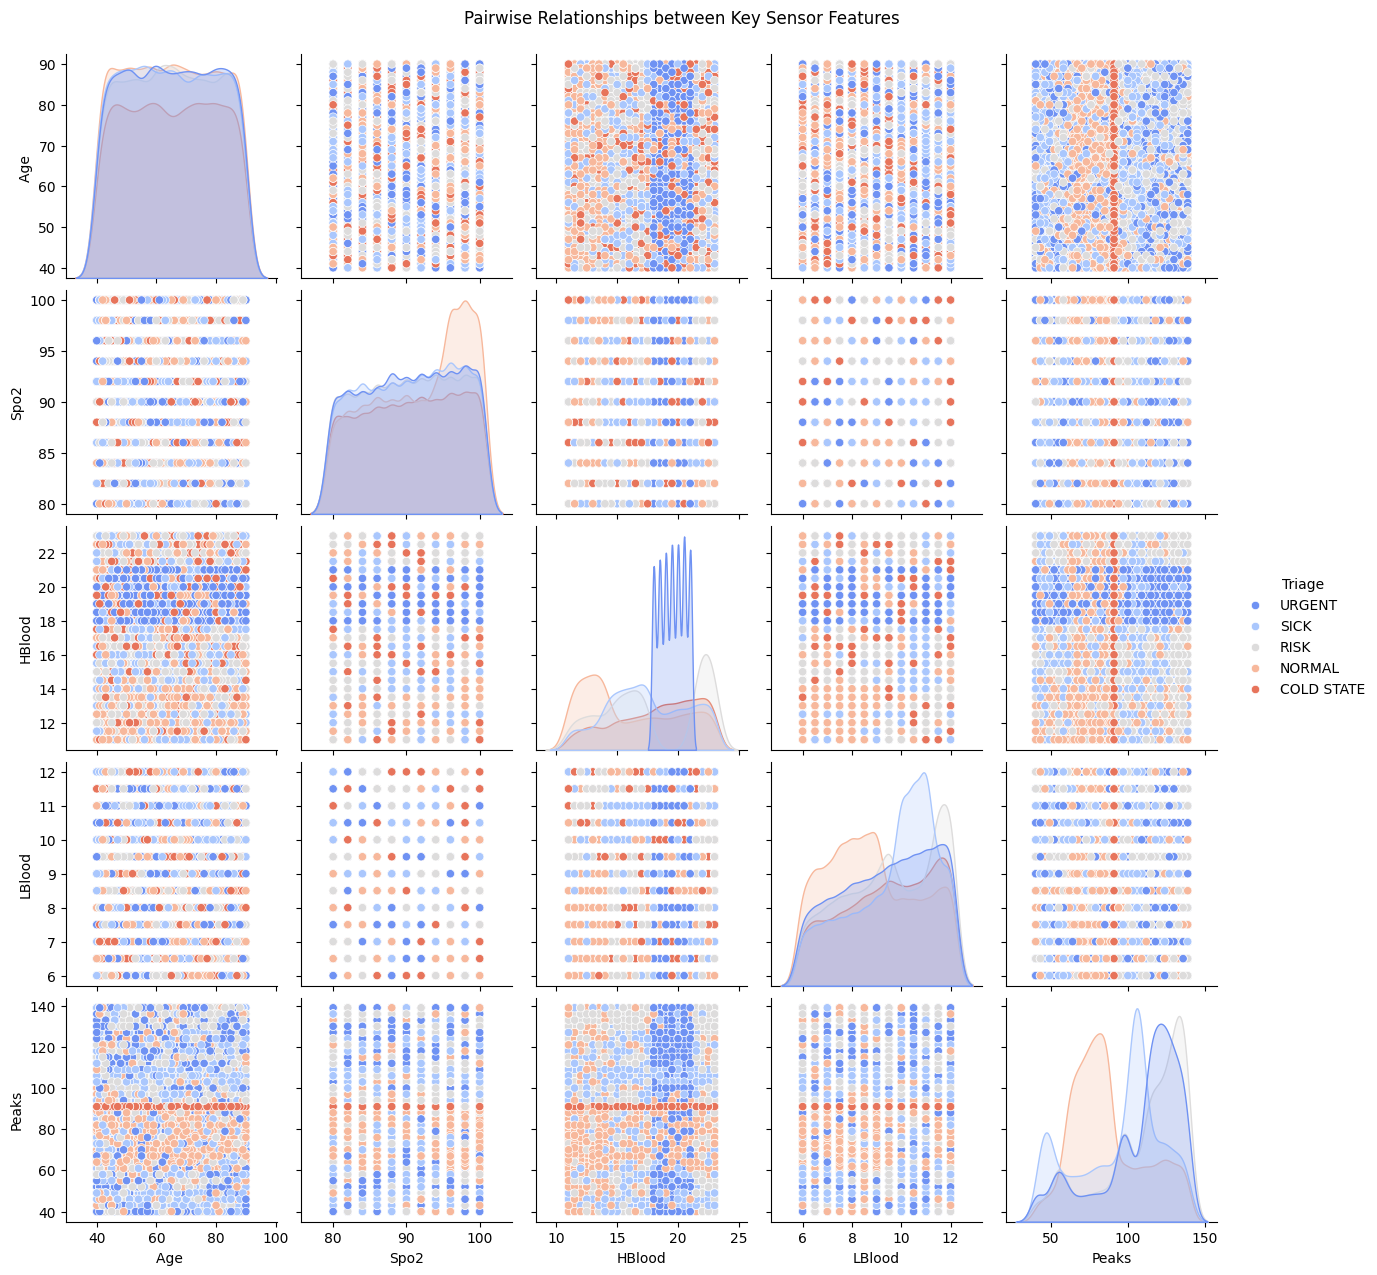

In [ ]:
#  Pair Plot for Key Variables
sns.pairplot(df, vars=['Age ', 'Spo2', 'HBlood', 'LBlood', 'Peaks'], hue='Triage', palette='coolwarm')
plt.suptitle("Pairwise Relationships between Key Sensor Features", y=1.02)
plt.show()


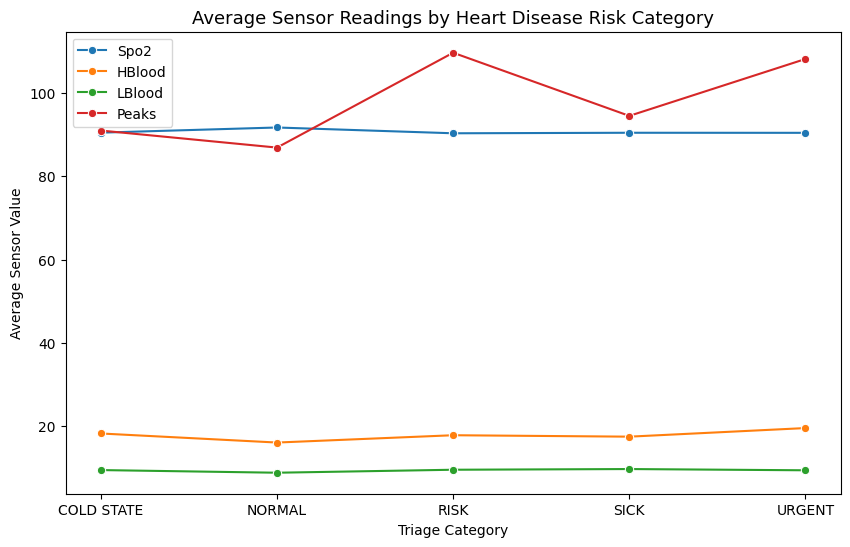

In [ ]:

# Average Sensor Values by Triage Category
avg_features = df.groupby('Triage')[['Spo2', 'HBlood', 'LBlood', 'Peaks']].mean().reset_index()

plt.figure(figsize=(10,6))
for col in ['Spo2', 'HBlood', 'LBlood', 'Peaks']:
    sns.lineplot(x='Triage', y=col, data=avg_features, marker='o', label=col)
plt.title("Average Sensor Readings by Heart Disease Risk Category", fontsize=13)
plt.xlabel("Triage Category")
plt.ylabel("Average Sensor Value")
plt.legend()
plt.show()


## **Encode All Categorical Columns:**
We convert **all categorical (string) columns** in the dataset into numeric form using Label Encoding.
This includes:
- Sex
- ChestPain
- SHBreath
- Palip
- Rest
- P_P
- STE1
- Triage (target variable)

Label encoding assigns numeric codes for each category:
e.g., M→1, F→0, Yes→1, No→0, regular→1, irregular→0, etc.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to preserve original structure
df_encoded = df.copy()

# Detect all object (categorical) columns automatically
cat_cols = df_encoded.select_dtypes(include='object').columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(" All categorical columns have been label-encoded successfully!\n")
print("Encoded Columns:", cat_cols)

# Display a sample of the encoded dataset
df_encoded.head()


 All categorical columns have been label-encoded successfully!

Encoded Columns: ['Sex', 'ChestPain', 'SHBreath', 'Palip', 'Rest', 'P_P', 'STEl', 'Triage']


,P. ID,Age,Sex,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
0,1,78,0,96,21.0,11.5,0,1,1,1,121,0.4,1,0,4
1,2,77,0,98,17.5,9.5,0,0,0,0,97,0.4,0,1,3
2,3,59,0,94,22.5,9.0,1,0,0,1,76,0.4,0,0,2
3,4,62,1,82,22.5,12.0,0,0,1,1,64,0.4,1,0,1
4,5,78,1,86,11.5,10.5,1,1,1,1,106,0.2,0,0,3


In [ ]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# **Model Training**

**Setting Target Variable and Dataset splitting**

In [ ]:
target_col = "Triage"
id_cols = ["P. ID"]
feature_cols = [c for c in df_encoded.columns if c not in id_cols + [target_col]]

X = df_encoded[feature_cols].values
y = df_encoded[target_col].astype(int).values
classes = np.unique(y)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scale for LR / SVM (not for RF). No pipelines used — manual fit/transform.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


**Helper Function for Evaluation Metrics and Plotting**

In [ ]:
def print_basic_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro")
    print(f"\n=== {name} : Test Metrics ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1: {f1m:.4f}")
    print("\nClassification report:")
    print(classification_report(y_true, y_pred, digits=3))

def plot_confusion_matrix(name, y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig = plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    ticks = np.arange(len(labels))
    plt.xticks(ticks, labels)
    plt.yticks(ticks, labels)
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha="center", va="center")
    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(name, y_true, scores, labels):
    """
    scores: shape (n_samples, n_classes) of probabilities or decision scores.
    """
    # Binarize the output
    y_bin = label_binarize(y_true, classes=labels)
    n_classes = y_bin.shape[1]

    # 1. Calculate Micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), scores.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)

    # 2. Calculate Per-class ROC and AUC
    fprs, tprs, aucs = {}, {}, {}
    for i, c in enumerate(labels):
        fprs[c], tprs[c], _ = roc_curve(y_bin[:, i], scores[:, i])
        aucs[c] = auc(fprs[c], tprs[c])

    # 3. Calculate Macro-average AUC (simple mean of AUCs)
    auc_macro = np.mean(list(aucs.values()))

    # --- PLOTTING ALL IN ONE FIGURE ---
    plt.figure(figsize=(10, 8))  # Set a larger figure size for clarity

    # Plot Micro-average
    plt.plot(
        fpr_micro, tpr_micro,
        label=f"Micro-average (AUC={auc_micro:.3f})",
        color='deeppink', linestyle=':', linewidth=4
    )

    # Plot Each Class
    # You can iterate through a colormap if you have many classes,
    # but default auto-colors usually work well for < 10 classes.
    for c in labels:
        plt.plot(
            fprs[c], tprs[c],
            lw=2,
            label=f"Class {c} (AUC={aucs[c]:.3f})"
        )

    # Plot Diagonal (Random Guess)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Formatting
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} — Multiclass ROC Curve (Macro AUC={auc_macro:.3f})")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print Summary
    print(f"{name} — ROC AUCs:")
    for c in labels:
        print(f"  Class {c}: {aucs[c]:.4f}")
    print(f"  Micro-average: {auc_micro:.4f}")
    print(f"  Macro-average: {auc_macro:.4f}")


**Logistic Regression**

LogReg Train time: 0.3144s | Test time: 0.0076s

=== Logistic Regression : Test Metrics ===
Accuracy: 0.4459
Macro F1: 0.3948

Classification report:
              precision    recall  f1-score   support

           0      0.146     0.038     0.060      2150
           1      0.530     0.708     0.606      2651
           2      0.447     0.267     0.334      2527
           3      0.449     0.622     0.521      2580
           4      0.402     0.516     0.452      2592

    accuracy                          0.446     12500
   macro avg      0.395     0.430     0.395     12500
weighted avg      0.404     0.446     0.408     12500



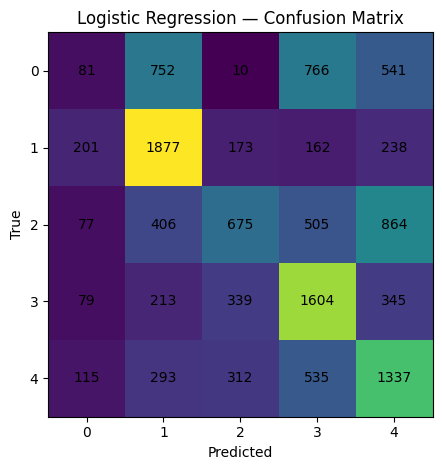

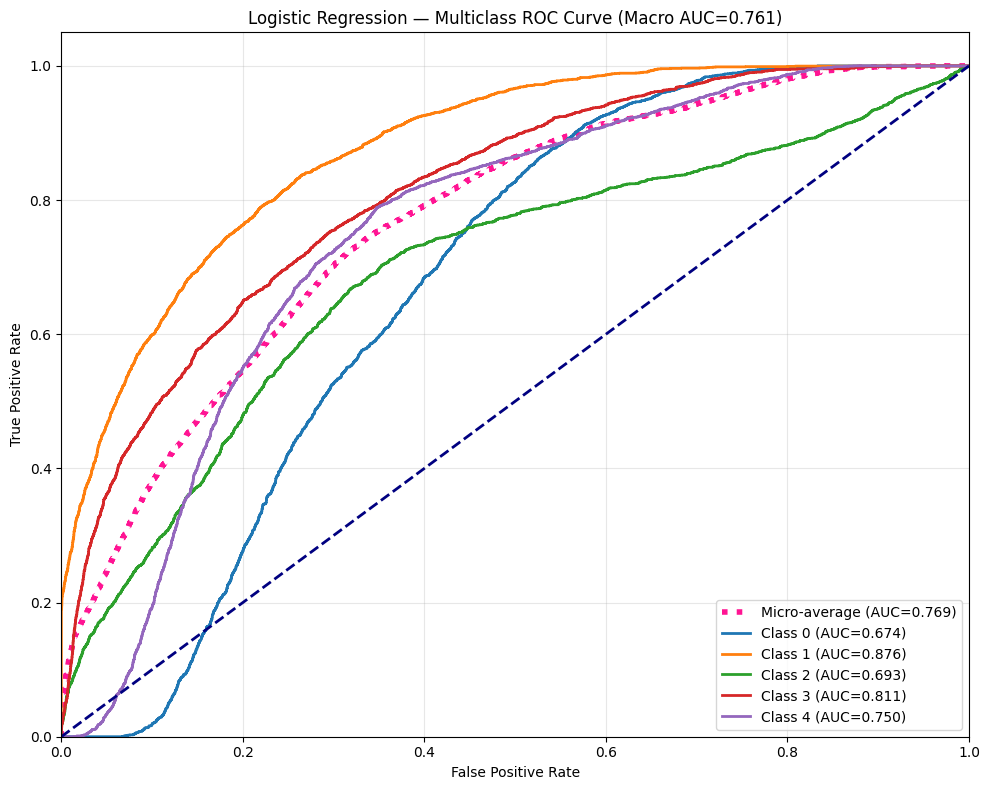

Logistic Regression — ROC AUCs:
  Class 0: 0.6735
  Class 1: 0.8761
  Class 2: 0.6932
  Class 3: 0.8115
  Class 4: 0.7504
  Micro-average: 0.7687
  Macro-average: 0.7610


In [ ]:
logreg = LogisticRegression(
    multi_class="ovr", solver="lbfgs", max_iter=1000, class_weight=None
)

t0 = time.perf_counter()
logreg.fit(X_train_scaled, y_train)
train_time_lr = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_lr = logreg.predict(X_test_scaled)
test_time_lr = time.perf_counter() - t1

print(f"LogReg Train time: {train_time_lr:.4f}s | Test time: {test_time_lr:.4f}s")
print_basic_metrics("Logistic Regression", y_test, y_pred_lr)
plot_confusion_matrix("Logistic Regression", y_test, y_pred_lr, classes)

# ROC (use predict_proba if available; LogisticRegression has it)
proba_lr = logreg.predict_proba(X_test_scaled)
plot_multiclass_roc("Logistic Regression", y_test, proba_lr, classes)


Logistic Rgression with out scalling

LogReg Train time: 27.8239s | Test time: 0.0044s

=== Logistic Regression : Test Metrics ===
Accuracy: 0.4446
Macro F1: 0.3935

Classification report:
              precision    recall  f1-score   support

           0      0.141     0.036     0.057      2150
           1      0.528     0.704     0.604      2651
           2      0.446     0.268     0.334      2527
           3      0.449     0.620     0.521      2580
           4      0.401     0.517     0.452      2592

    accuracy                          0.445     12500
   macro avg      0.393     0.429     0.393     12500
weighted avg      0.402     0.445     0.407     12500



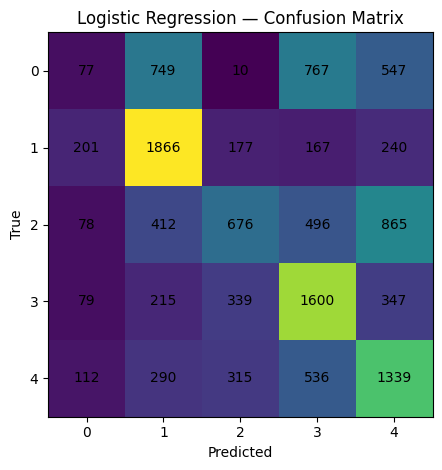

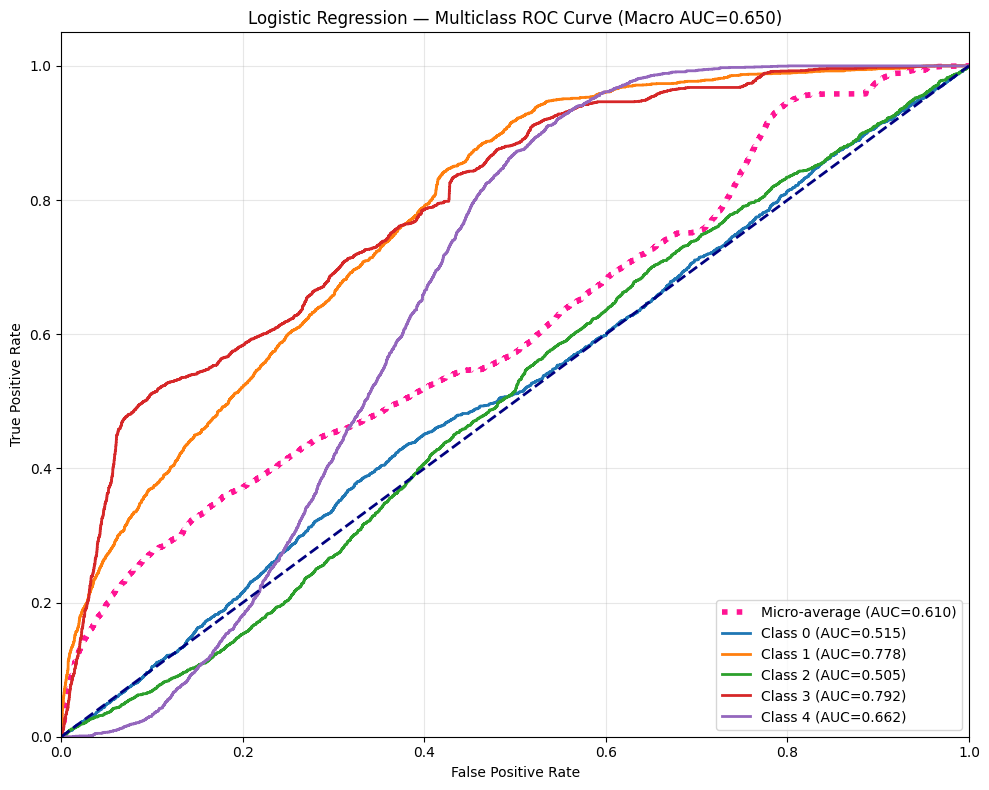

Logistic Regression — ROC AUCs:
  Class 0: 0.5152
  Class 1: 0.7778
  Class 2: 0.5047
  Class 3: 0.7921
  Class 4: 0.6620
  Micro-average: 0.6105
  Macro-average: 0.6504


In [ ]:
logreg = LogisticRegression(
    multi_class="ovr", solver="lbfgs", max_iter=1000, class_weight=None
)

t0 = time.perf_counter()
logreg.fit(X_train, y_train)
train_time_lr = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_lr = logreg.predict(X_test)
test_time_lr = time.perf_counter() - t1

print(f"LogReg Train time: {train_time_lr:.4f}s | Test time: {test_time_lr:.4f}s")
print_basic_metrics("Logistic Regression", y_test, y_pred_lr)
plot_confusion_matrix("Logistic Regression", y_test, y_pred_lr, classes)

# ROC (use predict_proba if available; LogisticRegression has it)
proba_lr = logreg.predict_proba(X_test_scaled)
plot_multiclass_roc("Logistic Regression", y_test, proba_lr, classes)


**Random Forest**

RandomForest Train time: 18.4221s | Test time: 1.2874s

=== Random Forest : Test Metrics ===
Accuracy: 0.9703
Macro F1: 0.9707

Classification report:
              precision    recall  f1-score   support

           0      0.973     1.000     0.986      2150
           1      0.969     0.958     0.964      2651
           2      0.962     0.975     0.968      2527
           3      0.975     0.932     0.953      2580
           4      0.973     0.992     0.982      2592

    accuracy                          0.970     12500
   macro avg      0.970     0.971     0.971     12500
weighted avg      0.970     0.970     0.970     12500



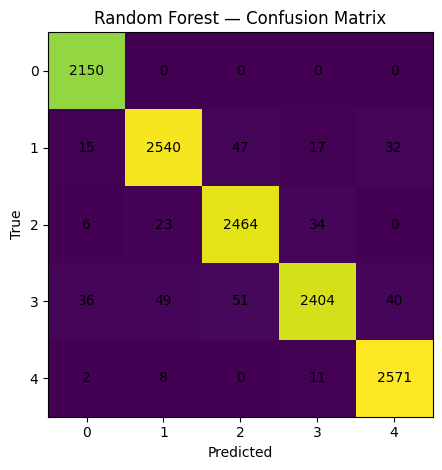

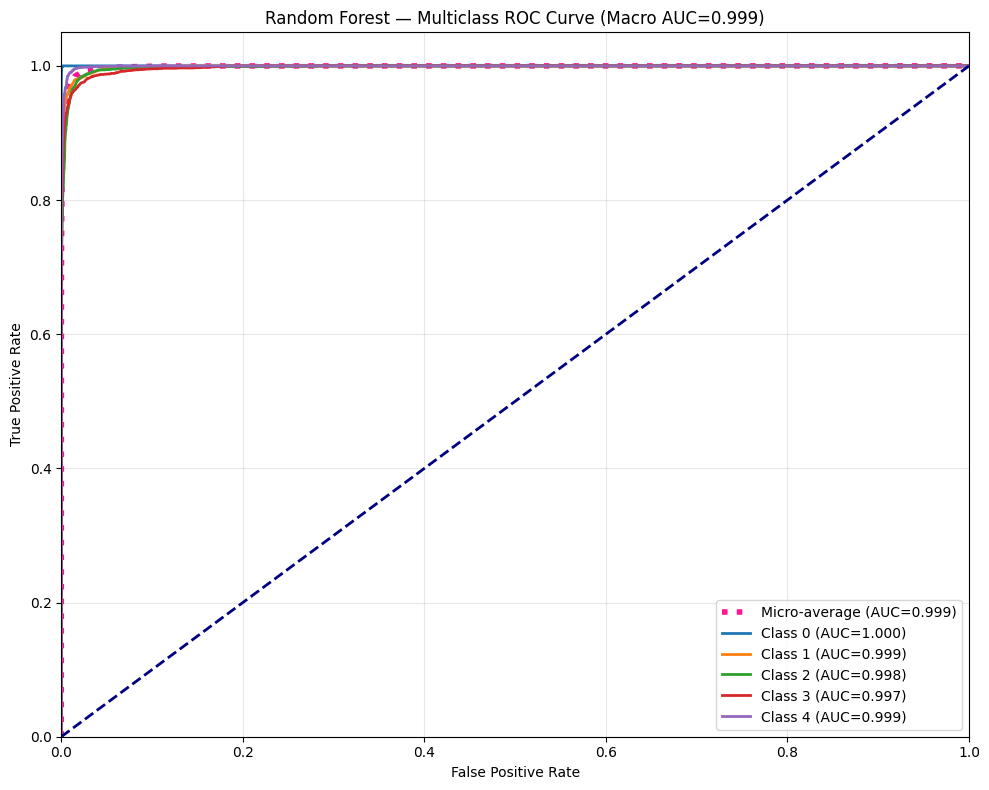

Random Forest — ROC AUCs:
  Class 0: 1.0000
  Class 1: 0.9987
  Class 2: 0.9979
  Class 3: 0.9975
  Class 4: 0.9993
  Micro-average: 0.9987
  Macro-average: 0.9987


In [ ]:
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    class_weight=None
)

t0 = time.perf_counter()
rf.fit(X_train, y_train)  # no scaling for trees
train_time_rf = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_rf = rf.predict(X_test)
test_time_rf = time.perf_counter() - t1

print(f"RandomForest Train time: {train_time_rf:.4f}s | Test time: {test_time_rf:.4f}s")
print_basic_metrics("Random Forest", y_test, y_pred_rf)
plot_confusion_matrix("Random Forest", y_test, y_pred_rf, classes)

# ROC (probabilities from RF)
proba_rf = rf.predict_proba(X_test)
plot_multiclass_roc("Random Forest", y_test, proba_rf, classes)


## **Support Vector Machine**

SVM (RBF) Train time: 458.6402s | Test time: 27.3270s

=== SVM (RBF) : Test Metrics ===
Accuracy: 0.6995
Macro F1: 0.6970

Classification report:
              precision    recall  f1-score   support

           0      0.559     0.814     0.663      2150
           1      0.769     0.809     0.789      2651
           2      0.786     0.561     0.655      2527
           3      0.695     0.630     0.661      2580
           4      0.740     0.697     0.718      2592

    accuracy                          0.700     12500
   macro avg      0.710     0.702     0.697     12500
weighted avg      0.715     0.700     0.699     12500



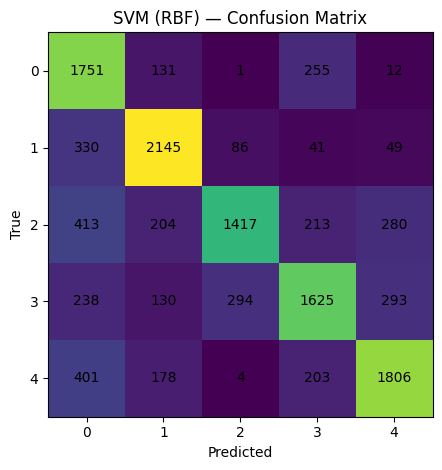

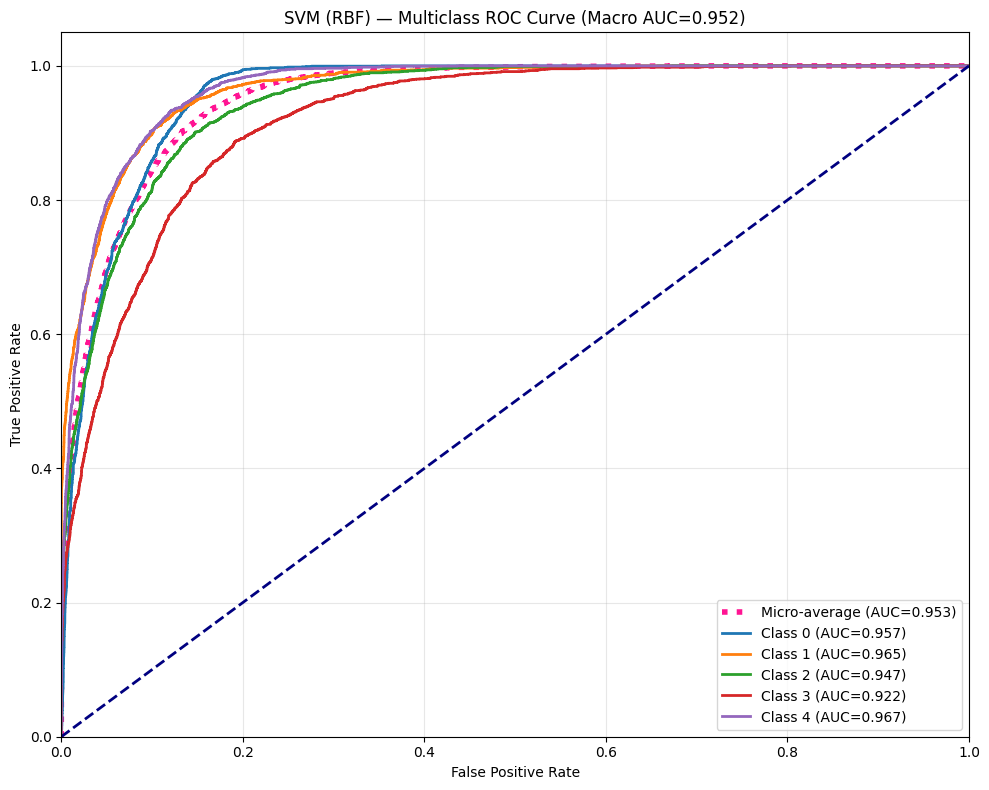

SVM (RBF) — ROC AUCs:
  Class 0: 0.9574
  Class 1: 0.9655
  Class 2: 0.9469
  Class 3: 0.9217
  Class 4: 0.9673
  Micro-average: 0.9530
  Macro-average: 0.9517


In [ ]:
svm = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    probability=True,   # needed for ROC curves / predict_proba
    random_state=42
)

t0 = time.perf_counter()
svm.fit(X_train_scaled, y_train)
train_time_svm = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_svm = svm.predict(X_test_scaled)
test_time_svm = time.perf_counter() - t1

print(f"SVM (RBF) Train time: {train_time_svm:.4f}s | Test time: {test_time_svm:.4f}s")
print_basic_metrics("SVM (RBF)", y_test, y_pred_svm)
plot_confusion_matrix("SVM (RBF)", y_test, y_pred_svm, classes)

# ROC (probabilities via Platt scaling since probability=True)
proba_svm = svm.predict_proba(X_test_scaled)
plot_multiclass_roc("SVM (RBF)", y_test, proba_svm, classes)


**Stratified K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold

k = 5  # adjust for your dataset size; must be <= smallest class count
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

def kfold_report(name, model, X_full, y_full, needs_scaling=False):
    acc_scores = []
    f1m_scores = []
    train_times = []
    test_times = []

    for train_idx, val_idx in skf.split(X_full, y_full):
        X_tr, X_val = X_full[train_idx], X_full[val_idx]
        y_tr, y_val = y_full[train_idx], y_full[val_idx]

        if needs_scaling:
            scaler_k = StandardScaler()
            X_tr = scaler_k.fit_transform(X_tr)
            X_val = scaler_k.transform(X_val)

        t0 = time.perf_counter()
        model.fit(X_tr, y_tr)
        train_times.append(time.perf_counter() - t0)

        t1 = time.perf_counter()
        y_val_pred = model.predict(X_val)
        test_times.append(time.perf_counter() - t1)

        acc_scores.append(accuracy_score(y_val, y_val_pred))
        f1m_scores.append(f1_score(y_val, y_val_pred, average="macro"))

    print(f"\n=== {name} : {k}-Fold Validation ===")
    print(f"Accuracy: mean={np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
    print(f"Macro F1: mean={np.mean(f1m_scores):.4f} ± {np.std(f1m_scores):.4f}")
    print(f"Train time per fold: mean={np.mean(train_times):.4f}s")
    print(f"Test  time per fold: mean={np.mean(test_times):.4f}s")

# Fresh models for CV
kfold_report("Logistic Regression",
             LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=1000),
             X, y, needs_scaling=True)

kfold_report("Random Forest",
             RandomForestClassifier(n_estimators=400, random_state=42),
             X, y, needs_scaling=False)

kfold_report("SVM (RBF)",
             SVC(kernel="rbf", C=1.0, gamma="scale"),
             X, y, needs_scaling=True)



=== Logistic Regression : 5-Fold Validation ===
Accuracy: mean=0.4445 ± 0.0057
Macro F1: mean=0.3934 ± 0.0057
Train time per fold: mean=0.3181s
Test  time per fold: mean=0.0035s

=== Random Forest : 5-Fold Validation ===
Accuracy: mean=0.9736 ± 0.0012
Macro F1: mean=0.9741 ± 0.0011
Train time per fold: mean=18.5378s
Test  time per fold: mean=1.0508s

=== SVM (RBF) : 5-Fold Validation ===
Accuracy: mean=0.7028 ± 0.0067
Macro F1: mean=0.7002 ± 0.0070
Train time per fold: mean=84.3554s
Test  time per fold: mean=23.2733s


# **Baysian Hyperparameter Optimization**

In [ ]:
!pip install optuna

[I 2025-12-12 20:53:24,357] A new study created in memory with name: no-name-90a51f8c-32ec-4ded-b7f8-7d8e0b28d625


Starting Bayesian Optimization...


[I 2025-12-12 20:53:28,788] Trial 0 finished with value: 0.4446933333333334 and parameters: {'C': 0.13831656101168174, 'solver': 'liblinear'}. Best is trial 0 with value: 0.4446933333333334.
[I 2025-12-12 20:53:29,473] Trial 1 finished with value: 0.45426666666666665 and parameters: {'C': 0.000135059616381403, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.45426666666666665.
[I 2025-12-12 20:53:30,328] Trial 2 finished with value: 0.44458666666666674 and parameters: {'C': 0.10822252881830755, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.45426666666666665.
[I 2025-12-12 20:53:31,083] Trial 3 finished with value: 0.44442666666666664 and parameters: {'C': 0.01932116632016516, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.45426666666666665.
[I 2025-12-12 20:53:31,831] Trial 4 finished with value: 0.44464000000000004 and parameters: {'C': 0.14764197224549797, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.45426666666666665.
[I 2025-12-12 20:53:33,253] Trial 5 finished with va


Best Trial Accuracy: 0.4554
Best Parameters: {'C': 0.0001020026931431461, 'solver': 'newton-cg'}
Optimized LogReg Train time: 0.3323s | Test time: 0.0083s

=== Logistic Regression (Optimized) : Test Metrics ===
Accuracy: 0.4546
Macro F1: 0.3773

Classification report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000      2150
           1      0.488     0.773     0.599      2651
           2      0.533     0.195     0.286      2527
           3      0.433     0.661     0.523      2580
           4      0.422     0.554     0.479      2592

    accuracy                          0.455     12500
   macro avg      0.375     0.437     0.377     12500
weighted avg      0.388     0.455     0.392     12500



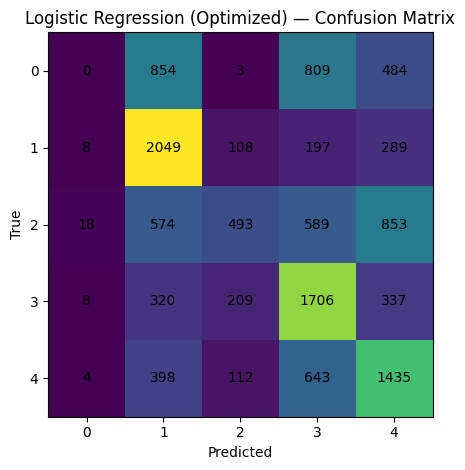

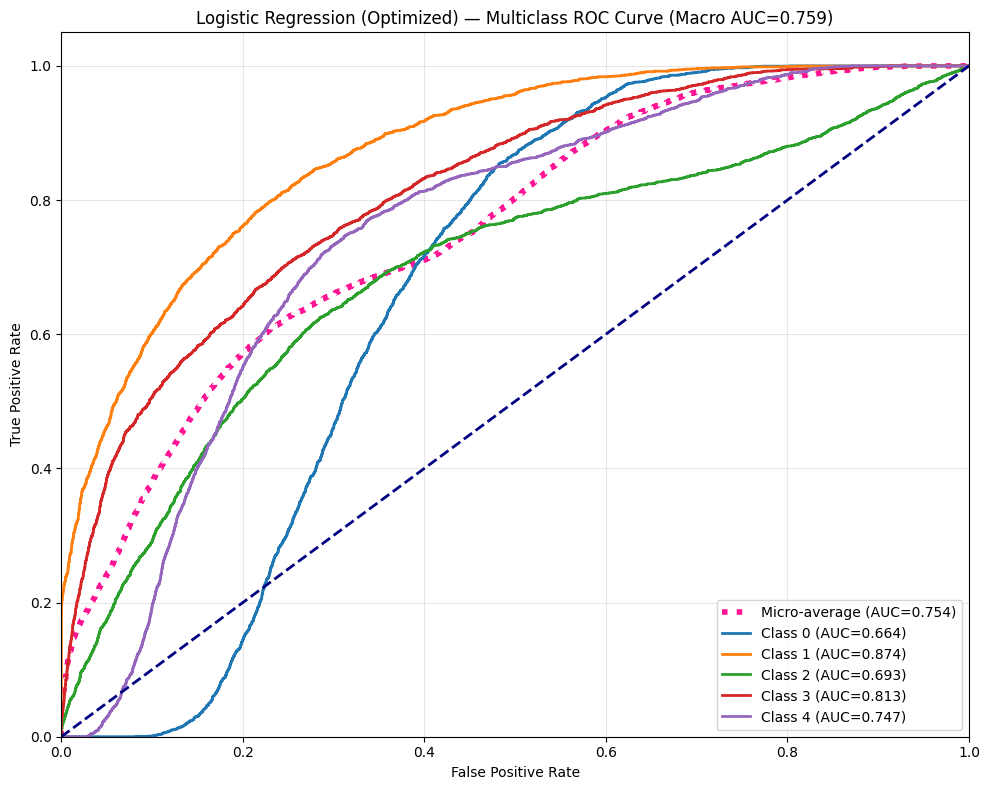

Logistic Regression (Optimized) — ROC AUCs:
  Class 0: 0.6642
  Class 1: 0.8744
  Class 2: 0.6932
  Class 3: 0.8135
  Class 4: 0.7475
  Micro-average: 0.7542
  Macro-average: 0.7585


In [ ]:
import time
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# --- 1. Define the Objective Function ---
def objective(trial):
    # Define the search space for hyperparameters
    # 'C' is the inverse of regularization strength (smaller = stronger regularization)
    c_value = trial.suggest_float("C", 1e-4, 100.0, log=True)

    # 'solver' determines the algorithm to use for optimization
    solver_choice = trial.suggest_categorical("solver", ["lbfgs", "liblinear", "newton-cg"])

    # Handle solver constraints (liblinear doesn't support 'multinomial' if you were using it,
    # but since you are using 'ovr', it is generally safe).

    # Instantiate the model with trial parameters
    clf = LogisticRegression(
        C=c_value,
        solver=solver_choice,
        multi_class="ovr",
        max_iter=1000,
        class_weight=None,
        random_state=42
    )

    # --- IMPLEMENT K-FOLD HERE (During Optimization) ---
    # We use StratifiedKFold to ensure class proportions are maintained in splits
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Calculate score (e.g., accuracy). You can change scoring to 'f1_macro' if data is imbalanced.
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=cv, scoring="accuracy", n_jobs=-1)

    # Return the mean accuracy of the folds
    return scores.mean()

# --- 2. Run Bayesian Optimization ---
print("Starting Bayesian Optimization...")
study = optuna.create_study(direction="maximize") # We want to maximize accuracy
study.optimize(objective, n_trials=20) # Run 20 different hyperparameter combinations

print(f"\nBest Trial Accuracy: {study.best_value:.4f}")
print(f"Best Parameters: {study.best_params}")

# --- 3. Retrain Final Model with Best Parameters ---
# Now we take the best parameters found and train on the FULL training set
best_params = study.best_params

logreg_opt = LogisticRegression(
    C=best_params["C"],
    solver=best_params["solver"],
    multi_class="ovr",
    max_iter=1000,
    class_weight=None,
    random_state=42
)

t0 = time.perf_counter()
logreg_opt.fit(X_train_scaled, y_train)
train_time_lr = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_lr = logreg_opt.predict(X_test_scaled)
test_time_lr = time.perf_counter() - t1

# --- 4. Evaluate ---
print(f"Optimized LogReg Train time: {train_time_lr:.4f}s | Test time: {test_time_lr:.4f}s")

# Assuming your custom functions (print_basic_metrics, etc.) are available in your scope:
print_basic_metrics("Logistic Regression (Optimized)", y_test, y_pred_lr)
plot_confusion_matrix("Logistic Regression (Optimized)", y_test, y_pred_lr, classes)

# ROC
proba_lr = logreg_opt.predict_proba(X_test_scaled)
plot_multiclass_roc("Logistic Regression (Optimized)", y_test, proba_lr, classes)

[I 2025-12-12 20:53:48,077] A new study created in memory with name: no-name-c8a25bfe-2ef5-42c1-9141-1e367e55a0d6


Starting Random Forest Optimization...


[I 2025-12-12 20:55:23,838] Trial 0 finished with value: 0.9554133333333332 and parameters: {'n_estimators': 791, 'max_depth': 50, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9554133333333332.
[I 2025-12-12 20:55:47,261] Trial 1 finished with value: 0.9467733333333334 and parameters: {'n_estimators': 211, 'max_depth': 25, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9554133333333332.
[I 2025-12-12 20:57:16,449] Trial 2 finished with value: 0.9569866666666667 and parameters: {'n_estimators': 772, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.9569866666666667.
[I 2025-12-12 20:57:26,791] Trial 3 finished with value: 0.8043733333333334 and parameters: {'n_estimators': 159, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.9569866666666667.
[I 2025-12-12 20:59:08,134] Trial 4 finished with value: 0.9605866666666667 and parameter


Best RF Accuracy: 0.9671
Best RF Parameters: {'n_estimators': 515, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 1}
Optimized Random Forest Train time: 17.6156s | Test time: 1.1210s

=== Random Forest (Optimized) : Test Metrics ===
Accuracy: 0.9710
Macro F1: 0.9714

Classification report:
              precision    recall  f1-score   support

           0      0.973     1.000     0.986      2150
           1      0.971     0.958     0.964      2651
           2      0.963     0.975     0.969      2527
           3      0.975     0.934     0.954      2580
           4      0.974     0.992     0.983      2592

    accuracy                          0.971     12500
   macro avg      0.971     0.972     0.971     12500
weighted avg      0.971     0.971     0.971     12500



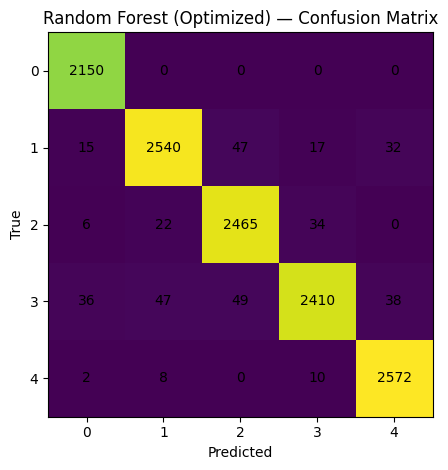

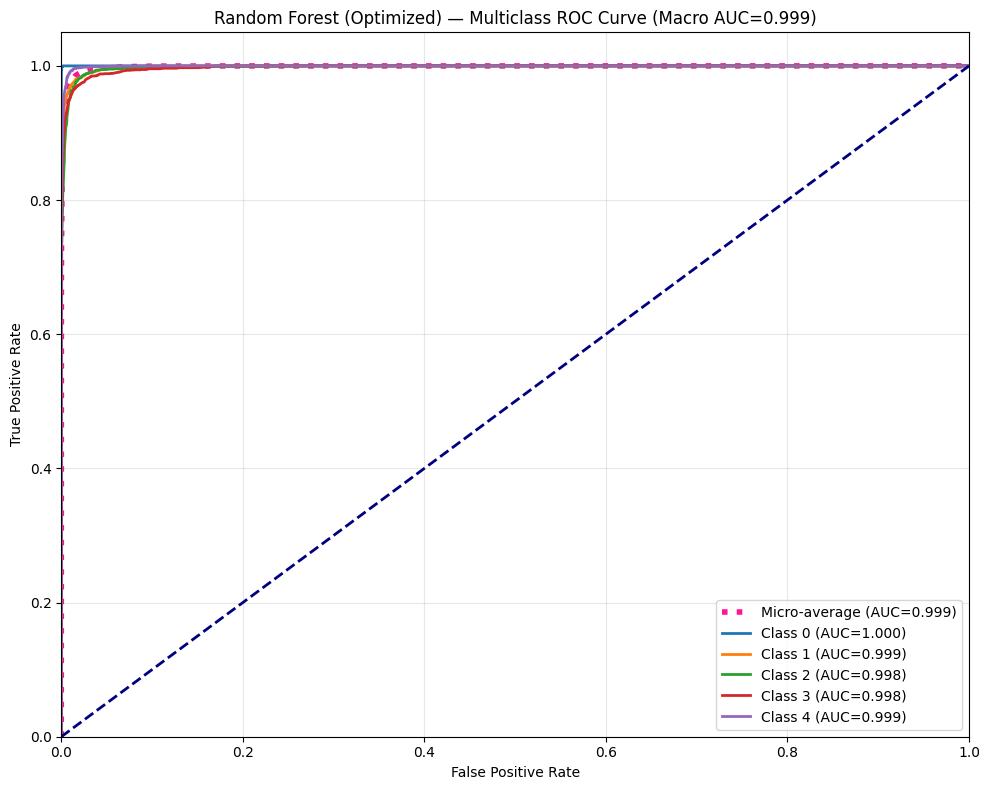

Random Forest (Optimized) — ROC AUCs:
  Class 0: 1.0000
  Class 1: 0.9987
  Class 2: 0.9980
  Class 3: 0.9975
  Class 4: 0.9994
  Micro-average: 0.9988
  Macro-average: 0.9987


In [ ]:
import time
import optuna
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# --- 1. Define the Objective Function ---
def objective_rf(trial):
    # Suggest hyperparameters for Random Forest
    n_estimators_opt = trial.suggest_int("n_estimators", 100, 800)
    max_depth_opt = trial.suggest_int("max_depth", 5, 50)
    min_samples_split_opt = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf_opt = trial.suggest_int("min_samples_leaf", 1, 10)

    # Instantiate the model
    # n_jobs=-1 uses all CPU cores to speed up training
    rf_clf = RandomForestClassifier(
        n_estimators=n_estimators_opt,
        max_depth=max_depth_opt,
        min_samples_split=min_samples_split_opt,
        min_samples_leaf=min_samples_leaf_opt,
        random_state=42,
        class_weight=None,
        n_jobs=-1
    )

    # --- IMPLEMENT K-FOLD HERE (During Optimization) ---
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Use X_train (unscaled) for Random Forest
    scores = cross_val_score(rf_clf, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)

    return scores.mean()

# --- 2. Run Bayesian Optimization ---
print("Starting Random Forest Optimization...")
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=20) # 20 trials is a good starting point

print(f"\nBest RF Accuracy: {study_rf.best_value:.4f}")
print(f"Best RF Parameters: {study_rf.best_params}")

# --- 3. Retrain Final Model with Best Parameters ---
best_params_rf = study_rf.best_params

rf_opt = RandomForestClassifier(
    n_estimators=best_params_rf["n_estimators"],
    max_depth=best_params_rf["max_depth"],
    min_samples_split=best_params_rf["min_samples_split"],
    min_samples_leaf=best_params_rf["min_samples_leaf"],
    random_state=42,
    class_weight=None,
    n_jobs=-1
)

t0 = time.perf_counter()
rf_opt.fit(X_train, y_train) # Fit on full training data
train_time_rf = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_rf = rf_opt.predict(X_test)
test_time_rf = time.perf_counter() - t1

# --- 4. Evaluate ---
print(f"Optimized Random Forest Train time: {train_time_rf:.4f}s | Test time: {test_time_rf:.4f}s")

# Assuming your custom functions are available:
print_basic_metrics("Random Forest (Optimized)", y_test, y_pred_rf)
plot_confusion_matrix("Random Forest (Optimized)", y_test, y_pred_rf, classes)

# ROC
proba_rf = rf_opt.predict_proba(X_test)
plot_multiclass_roc("Random Forest (Optimized)", y_test, proba_rf, classes)

[I 2025-12-12 21:15:37,573] A new study created in memory with name: no-name-0690c910-f6d5-4279-9620-7cef2b18c5d5


Starting SVM Optimization (Fast Mode)...


[I 2025-12-12 21:17:57,722] Trial 0 finished with value: 0.7253066666666667 and parameters: {'C': 2.982511278043496, 'gamma': 'auto'}. Best is trial 0 with value: 0.7253066666666667.
[I 2025-12-12 21:20:44,151] Trial 1 finished with value: 0.60936 and parameters: {'C': 0.19966747320022335, 'gamma': 'scale'}. Best is trial 0 with value: 0.7253066666666667.
[I 2025-12-12 21:23:12,078] Trial 2 finished with value: 0.6772 and parameters: {'C': 0.8330847926387163, 'gamma': 'auto'}. Best is trial 0 with value: 0.7253066666666667.
[I 2025-12-12 21:25:27,320] Trial 3 finished with value: 0.7592266666666667 and parameters: {'C': 11.55676973740165, 'gamma': 'auto'}. Best is trial 3 with value: 0.7592266666666667.
[I 2025-12-12 21:27:45,709] Trial 4 finished with value: 0.7338133333333333 and parameters: {'C': 3.80440418774265, 'gamma': 'scale'}. Best is trial 3 with value: 0.7592266666666667.
[I 2025-12-12 21:30:44,235] Trial 5 finished with value: 0.7706666666666667 and parameters: {'C': 85.326


Best SVM Accuracy: 0.7707
Best SVM Parameters: {'C': 86.96940909967005, 'gamma': 'auto'}
Optimized SVM (RBF) Train time: 579.7905s | Test time: 17.9001s

=== SVM (RBF) Optimized : Test Metrics ===
Accuracy: 0.7982
Macro F1: 0.7969

Classification report:
              precision    recall  f1-score   support

           0      0.748     0.873     0.806      2150
           1      0.852     0.865     0.858      2651
           2      0.780     0.742     0.760      2527
           3      0.748     0.678     0.711      2580
           4      0.855     0.843     0.849      2592

    accuracy                          0.798     12500
   macro avg      0.796     0.800     0.797     12500
weighted avg      0.799     0.798     0.797     12500



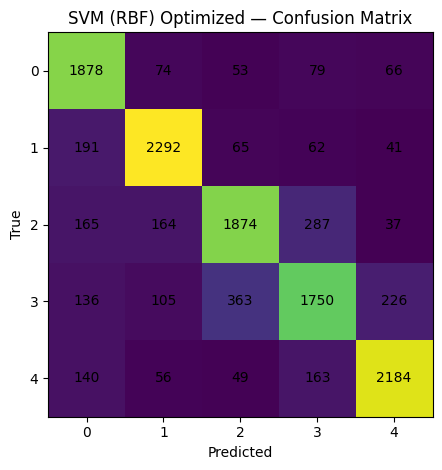

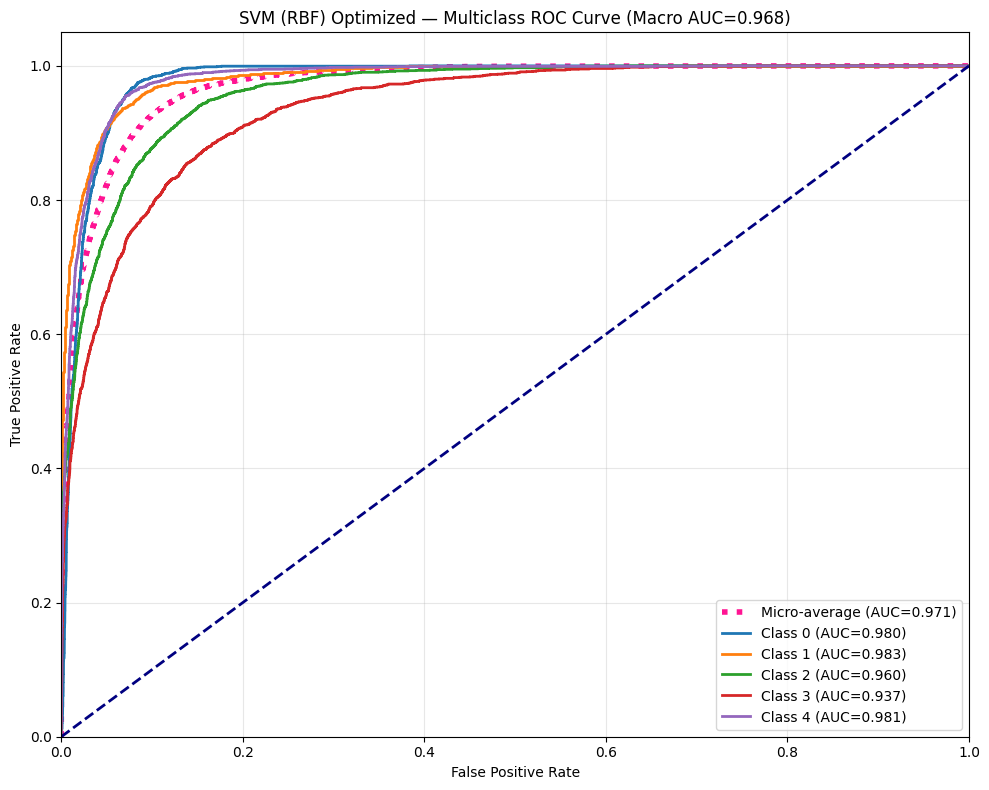

SVM (RBF) Optimized — ROC AUCs:
  Class 0: 0.9796
  Class 1: 0.9826
  Class 2: 0.9603
  Class 3: 0.9366
  Class 4: 0.9814
  Micro-average: 0.9711
  Macro-average: 0.9681


In [ ]:
import time
import optuna
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score


# --- 1. Define the Objective Function ---
def objective_svm(trial):
    c_value = trial.suggest_float("C", 0.1, 100.0, log=True)
    gamma_value = trial.suggest_categorical("gamma", ["scale", "auto"])

    # SPEED FIX: Set probability=False here
    # We don't need probabilities for accuracy, and this makes training 5x faster.
    svc_clf = SVC(
        kernel="rbf",
        C=c_value,
        gamma=gamma_value,
        probability=False,
        random_state=42
    )

    # SPEED FIX: Reduce n_splits to 3 (sufficient for hyperparameter tuning)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    scores = cross_val_score(svc_clf, X_train_scaled, y_train, cv=cv, scoring="accuracy", n_jobs=-1)

    return scores.mean()

# --- 2. Run Bayesian Optimization ---
print("Starting SVM Optimization (Fast Mode)...")
study_svm = optuna.create_study(direction="maximize")
# You can try increasing n_trials back to 15 or 20 now that it is faster
study_svm.optimize(objective_svm, n_trials=10)

print(f"\nBest SVM Accuracy: {study_svm.best_value:.4f}")
print(f"Best SVM Parameters: {study_svm.best_params}")

# --- 3. Retrain Final Model with Best Parameters ---
best_params_svm = study_svm.best_params

# FINAL MODEL: We turn probability=True back on here for the ROC curves
svm_opt = SVC(
    kernel="rbf",
    C=best_params_svm["C"],
    gamma=best_params_svm["gamma"],
    probability=True,
    random_state=42
)

t0 = time.perf_counter()
svm_opt.fit(X_train_scaled, y_train)
train_time_svm = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_svm = svm_opt.predict(X_test_scaled)
test_time_svm = time.perf_counter() - t1

# --- 4. Evaluate ---
print(f"Optimized SVM (RBF) Train time: {train_time_svm:.4f}s | Test time: {test_time_svm:.4f}s")

print_basic_metrics("SVM (RBF) Optimized", y_test, y_pred_svm)
plot_confusion_matrix("SVM (RBF) Optimized", y_test, y_pred_svm, classes)

proba_svm = svm_opt.predict_proba(X_test_scaled)
plot_multiclass_roc("SVM (RBF) Optimized", y_test, proba_svm, classes)

**K Fold Cross Validation After Tuning**

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# --- 1. Define the Models with Your Best Parameters ---

# Logistic Regression (Uses Scaled Data)
logreg_best = LogisticRegression(
    C=0.0001020026931431461,
    solver='newton-cg',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# Random Forest (Uses Unscaled Data)
rf_best = RandomForestClassifier(
    n_estimators=515,
    max_depth=39,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# SVM (Uses Scaled Data)
svm_best = SVC(
    C=86.96940909967005,
    gamma='auto',
    kernel='rbf',
    probability=True, # Optional here, but good if you need ROC later
    random_state=42
)

# --- 2. Setup K-Fold ---
# StratifiedKFold ensures each fold has the same proportion of class labels
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"{'Model':<25} | {'Mean Accuracy':<15} | {'Std Dev':<10}")
print("-" * 55)

# --- 3. Run Cross-Validation ---

# A. Logistic Regression
scores_lr = cross_val_score(logreg_best, X_train_scaled, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"{'Logistic Regression':<25} | {scores_lr.mean():.4f}          | {scores_lr.std():.4f}")

# B. Random Forest (Note: Using X_train, not scaled)
scores_rf = cross_val_score(rf_best, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"{'Random Forest':<25} | {scores_rf.mean():.4f}          | {scores_rf.std():.4f}")

# C. SVM
scores_svm = cross_val_score(svm_best, X_train_scaled, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"{'SVM (RBF)':<25} | {scores_svm.mean():.4f}          | {scores_svm.std():.4f}")

Model                     | Mean Accuracy   | Std Dev   
-------------------------------------------------------
Logistic Regression       | 0.4554          | 0.0051
Random Forest             | 0.9671          | 0.0029
SVM (RBF)                 | 0.7862          | 0.0032


## **Feature Importance Plot**


Extract and visualize feature importances directly from the trained RandomForestClassifier model to identify the most influential features.


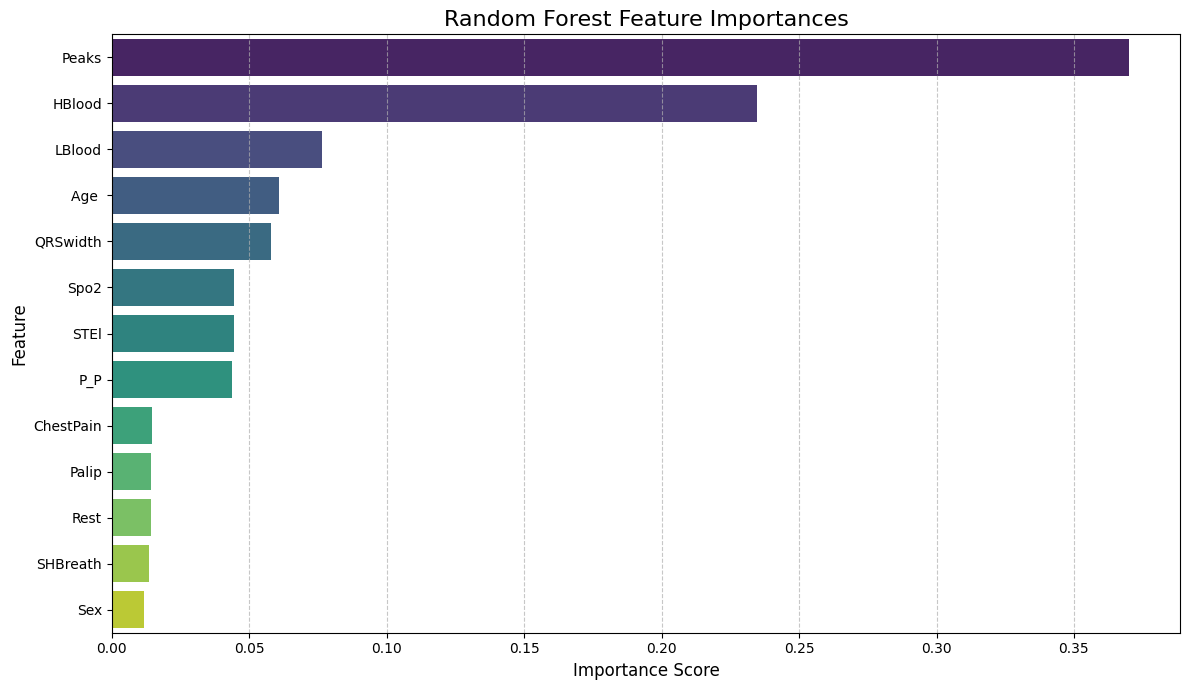

In [ ]:
feature_importances = rf.feature_importances_

# Create a Pandas Series with feature importances and feature names
importance_series = pd.Series(feature_importances, index=feature_cols)

# Sort the feature importances in descending order
sorted_importance_series = importance_series.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_importance_series.values, y=sorted_importance_series.index, palette='viridis')
plt.title('Random Forest Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
